In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


122B1F047 -Disha kamalaskar.
this is a note book run on Kaggle and the data set is from th e Kaggle Titanic competition dataset 

In [2]:
train=pd.read_csv("/kaggle/input/titanic/train.csv")
test=pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
train.shape

(891, 12)

In [4]:
train.head(20)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.describe(include="all")

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

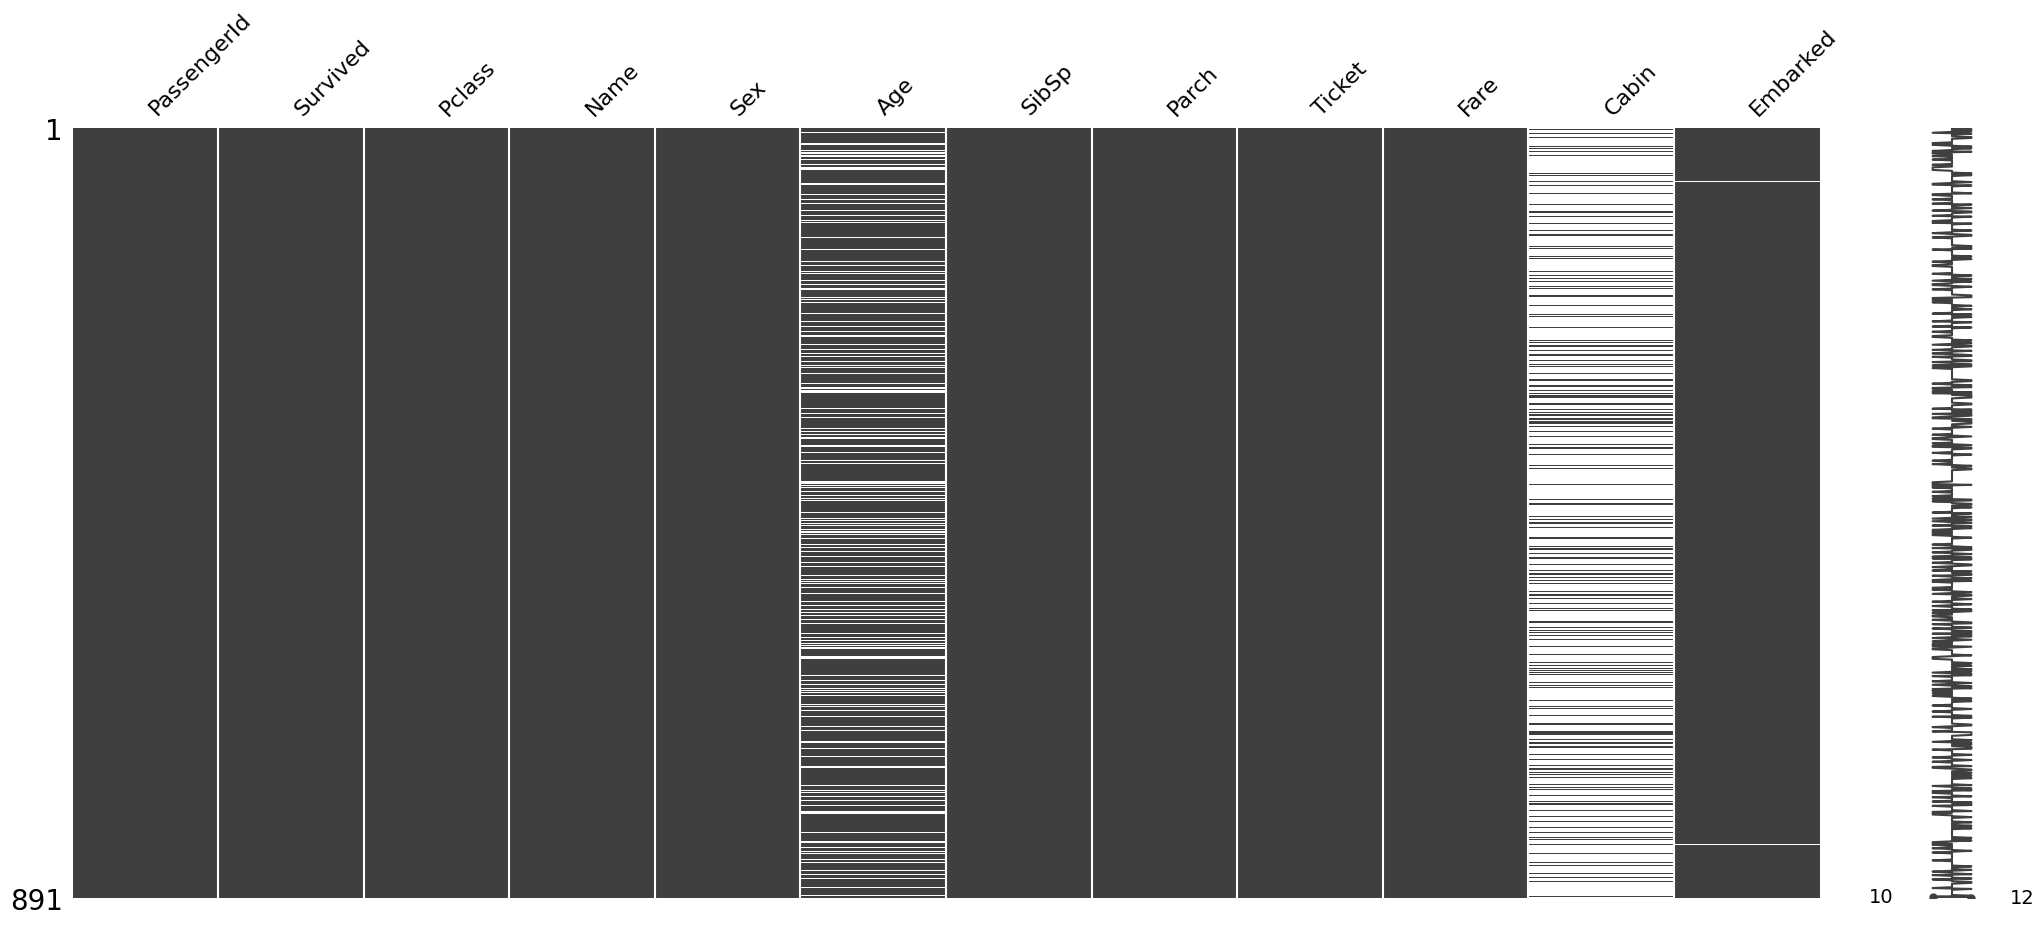

In [9]:
import missingno as msno
msno.matrix(train)

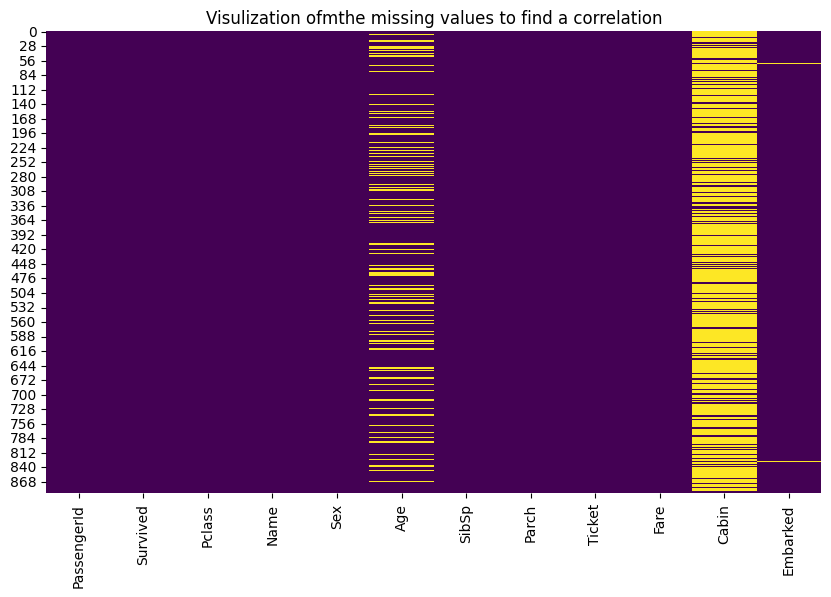

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title("Visulization ofmthe missing values to find a correlation")
plt.show()

No paricular pattern is seen in the missing values.

Inorder to imutethese missing values I am first finging out the skewness of "Age"

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


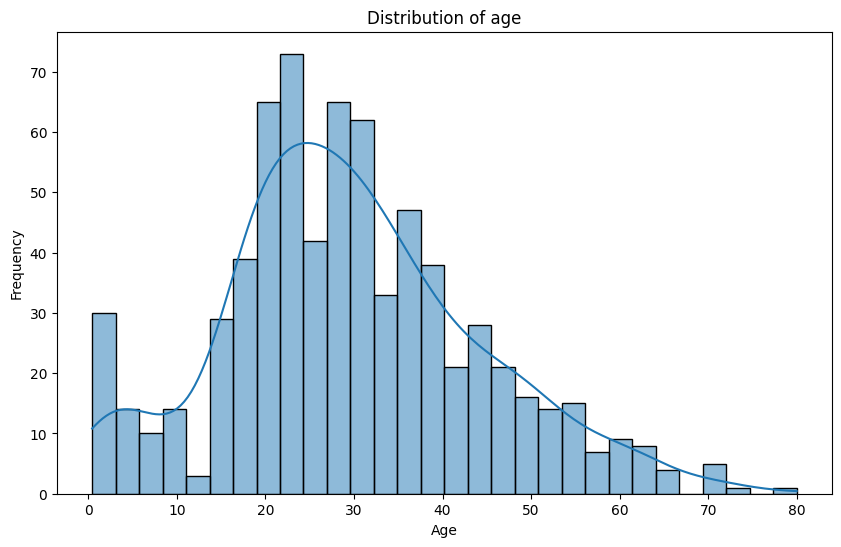

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(train['Age'], kde=True,bins=30)
plt.title("Distribution of age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


The data looks right skewed. Let's Verify!!

In [12]:
age_skew=train['Age'].skew()
print("Skewness of age=",age_skew)

Skewness of age= 0.38910778230082693


The skewness>0 which means data is right skewed.
As the data is right skewed we cannot impute with mean. Thus we will use median as it works better with outliers.

In [13]:
train['Age'].fillna(train['Age'].median(), inplace=True)

<ipython-input-13-82f4ae3f6554>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)


In [14]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The class Cabin seems to have some correlation with the socio economic class

In [15]:
# Group by Pclass and impute Cabin based on the mode of each group
train['Cabin'] = train.groupby('Pclass')['Cabin'].transform(lambda x: x.fillna(x.mode()[0]))


In [16]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [17]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

<ipython-input-17-2c007674ec75>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


In [18]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Lets head to the correlation analysis!!

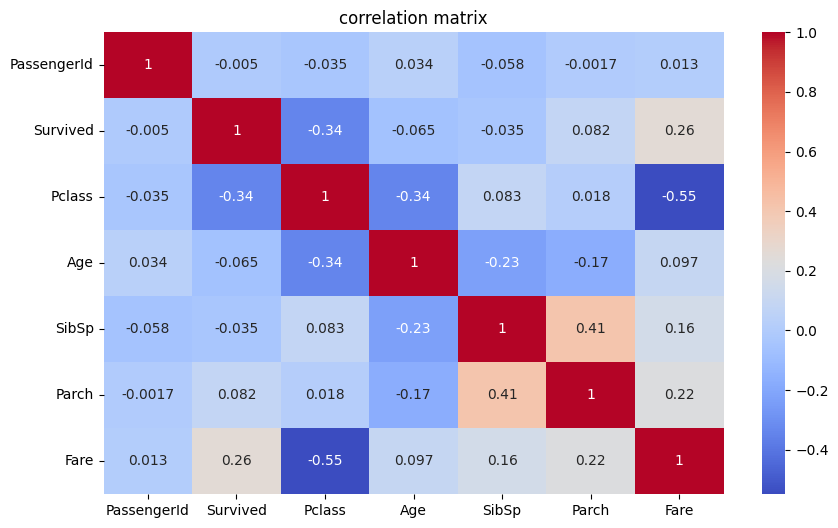

In [19]:
numerical_Train =train.select_dtypes(include=['float64','int64'])

correlationMatrix=numerical_Train.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlationMatrix, annot=True,cmap="coolwarm")
plt.title( 'correlation matrix')
plt.show()

There is negative correlation between fare and Pclass. there is a 0.41 correelation between Parch and SibSp(Both are family related columns).

There is also correlation of -0.34 between age and Pclass and Survived and pclass. This mighgt suggest multi-collinearity.

# Data Encoding

In [20]:
train.describe(include="all")

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,483,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Categorical coloumns(given to us as encoded)

Survival--0=No, 1=yes

Pclass : 
1 = 1st, 2 = 2nd, 3 = 3rd (1st = Upper
2nd = Middle
3rd = Lower)


Categorical coloumns(we need to encode)

Name (all are unique. Thus no point in encoding)

Sex (male , female ) - One hot can be used

Ticket number(all are unique. Thus no point in encoding)

Cabin number(The cabin numbers might have usefull values like for example the A series is closer to the boats.But there were also high number of missing values in this coloumn. Let us extract the First letter a, b, c and then encode it. )

Embarked - C = Cherbourg, Q = Queenstown, S = Southampton  (One hot encoding can be done)

In [21]:
train= pd.get_dummies(train, columns=['Sex'], drop_first=True)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
 11  Sex_male     891 non-null    bool   
dtypes: bool(1), float64(2), int64(5), object(4)
memory usage: 77.6+ KB


In [23]:
# Extract the first letter of the Cabin number as 'Cabin_deck'
train['Cabin_deck'] = train['Cabin'].str[0]

# One-Hot Encode 'Cabin_deck'
train = pd.get_dummies(train, columns=['Cabin_deck'], drop_first=True)

# Drop the original 'Cabin' column
train.drop(columns=['Cabin'], inplace=True)


In [24]:
# One-Hot Encode 'Embarked'
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Age           891 non-null    float64
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Ticket        891 non-null    object 
 8   Fare          891 non-null    float64
 9   Sex_male      891 non-null    bool   
 10  Cabin_deck_B  891 non-null    bool   
 11  Cabin_deck_C  891 non-null    bool   
 12  Cabin_deck_D  891 non-null    bool   
 13  Cabin_deck_E  891 non-null    bool   
 14  Cabin_deck_F  891 non-null    bool   
 15  Cabin_deck_G  891 non-null    bool   
 16  Cabin_deck_T  891 non-null    bool   
 17  Embarked_Q    891 non-null    bool   
 18  Embarked_S    891 non-null    

Now that all the encoding is done . Lets delve deeper into the data patterns

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


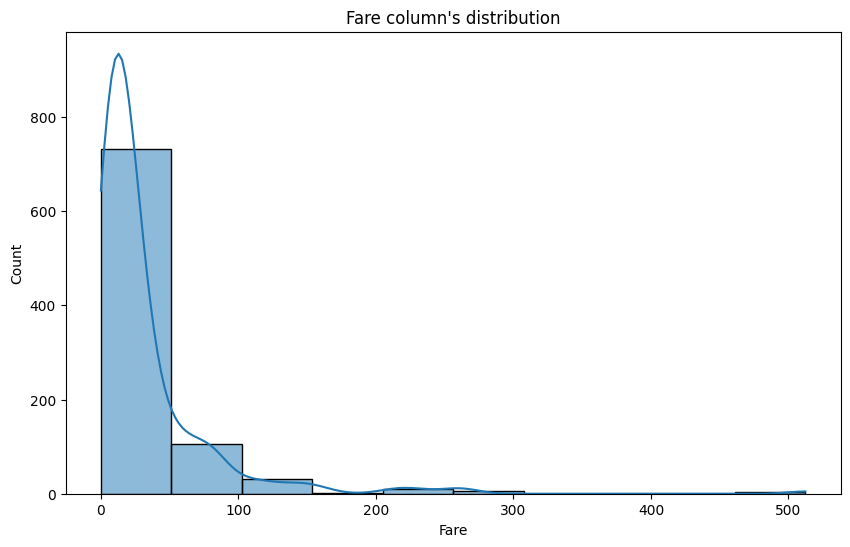

In [26]:
#Histogram for Fare
plt.figure(figsize=(10,6))
sns.histplot(train['Fare'], kde=True, bins=10)
plt.title("Fare column's distribution")
plt.show()

This column is Highly right-skewed

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


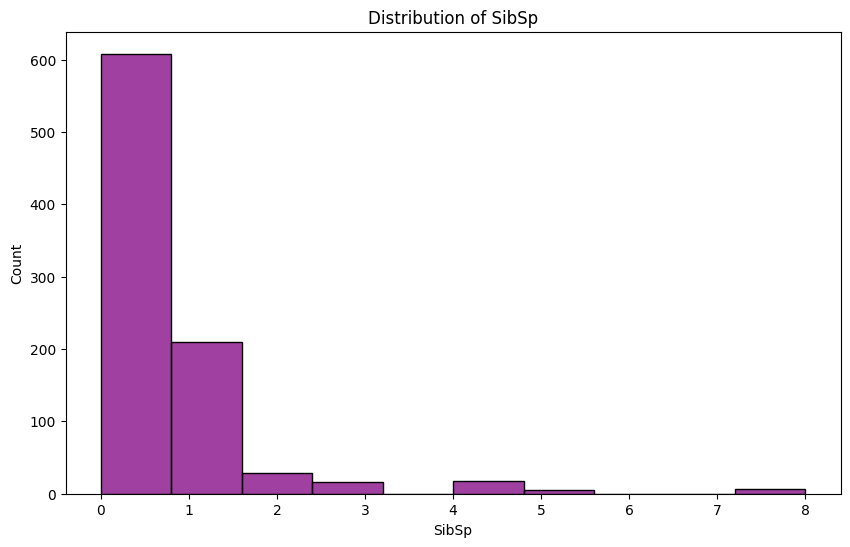

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(train['SibSp'], kde=False, bins=10, color='purple')
plt.title('Distribution of SibSp')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

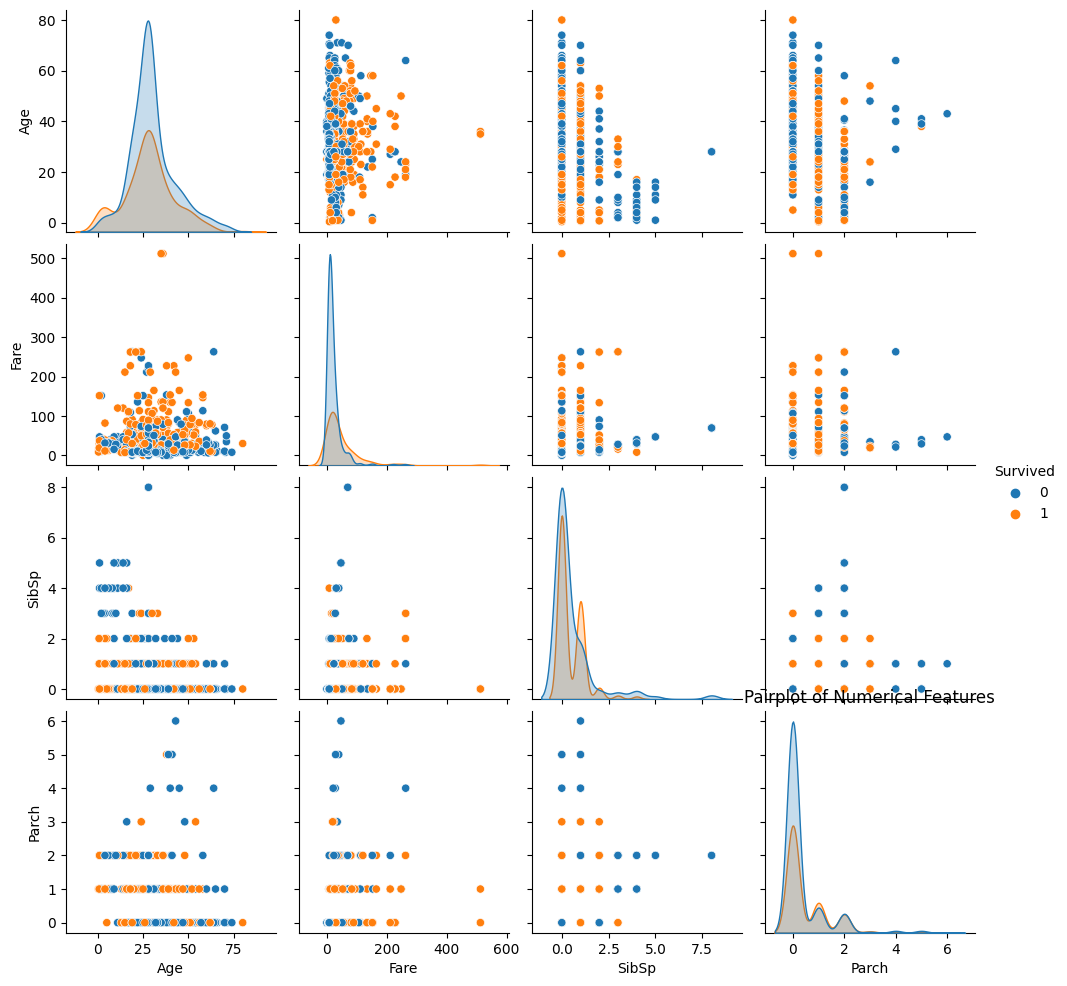

In [28]:
# Plot pairplot for a subset of numerical columns
sns.pairplot(train[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']], hue='Survived')
plt.title('Pairplot of Numerical Features')
plt.show()

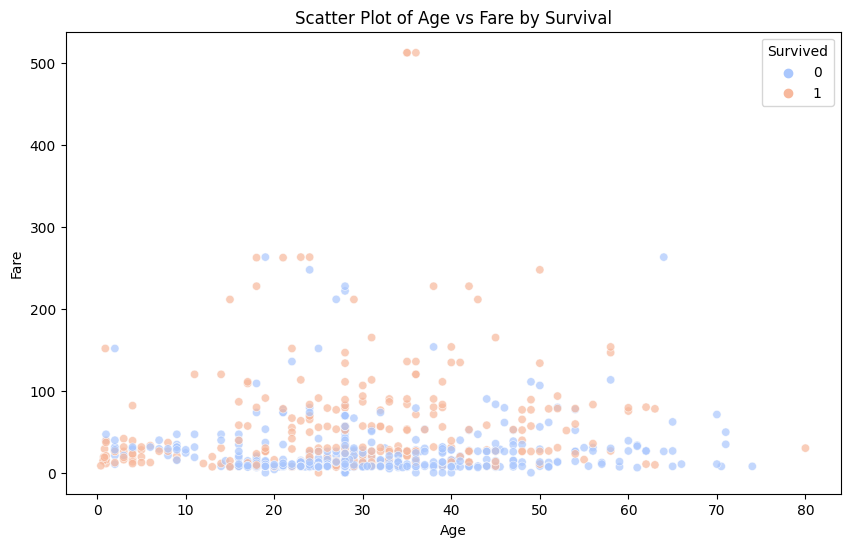

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Age vs Fare, colored by Survival
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train, palette='coolwarm', alpha=0.7)

# Adding title and labels
plt.title('Scatter Plot of Age vs Fare by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', loc='upper right')
plt.show()


People who have paid higher fare havehigher chances of survival.

people of lesser age also have highe rchances of survival.

In [30]:
# Analyze survival rate by Pclass
pclass_survival_rate = train.groupby('Pclass')['Survived'].mean()
print(pclass_survival_rate)

# Analyze survival rate by Sex
sex_survival_rate = train.groupby('Sex_male')['Survived'].mean()
print(sex_survival_rate)

# Analyze survival rate by Embarked
embarked_survival_rate = train.groupby('Embarked_Q')['Survived'].mean()
print(embarked_survival_rate)

# Analyze survival rate by Embarked
embarked_survival_rate = train.groupby('Embarked_S')['Survived'].mean()
print(embarked_survival_rate)


# Analyze survival rate by Age (categorizing Age into bins)
train['Age_group'] = pd.cut(train['Age'], bins=[0, 12, 18, 30, 50, 80], labels=['0-12', '13-18', '19-30', '31-50', '51-80'])
age_survival_rate = train.groupby('Age_group')['Survived'].mean()
print(age_survival_rate)


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Sex_male
False    0.742038
True     0.188908
Name: Survived, dtype: float64
Embarked_Q
False    0.383292
True     0.389610
Name: Survived, dtype: float64
Embarked_S
False    0.502041
True     0.339009
Name: Survived, dtype: float64
Age_group
0-12     0.579710
13-18    0.428571
19-30    0.331096
31-50    0.423237
51-80    0.343750
Name: Survived, dtype: float64


<ipython-input-30-1bea7b7afadd>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_rate = train.groupby('Age_group')['Survived'].mean()


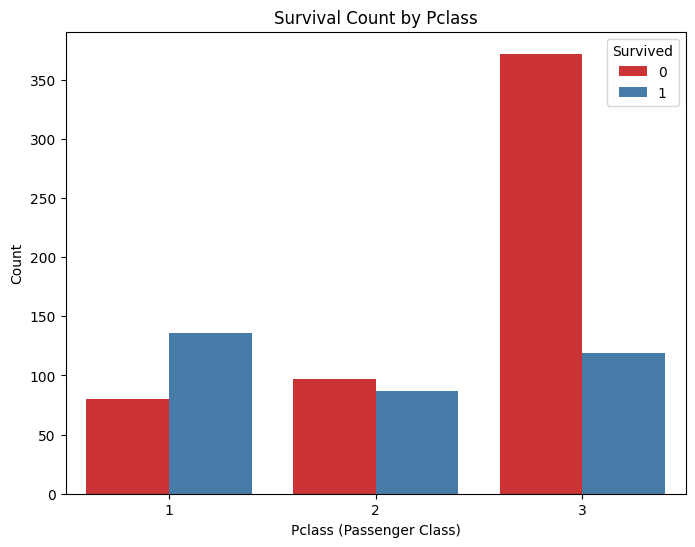

In [31]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the countplot for Pclass vs Survival
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=train, palette='Set1')

# Adding a title and labels
plt.title('Survival Count by Pclass')
plt.xlabel('Pclass (Passenger Class)')
plt.ylabel('Count')
plt.show()


The above observations show that the people form class 3 have lesser survial rates.

in class 2 there is almost as much as survival chances as for not.

In class 1 there are more chances of survival.

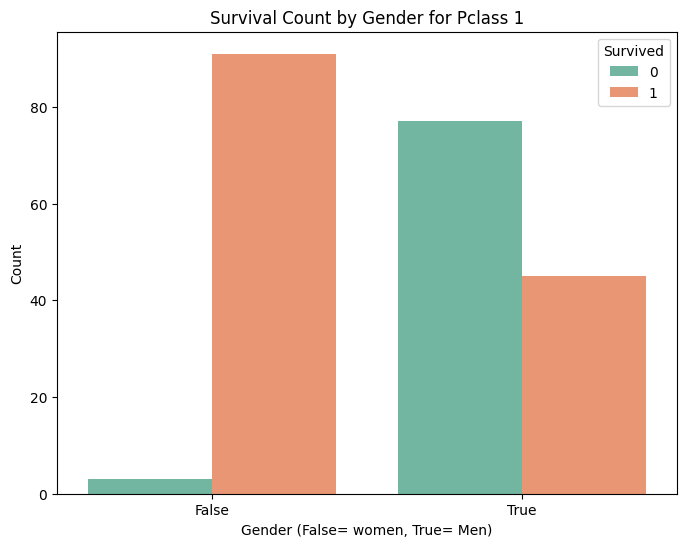

In [32]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for Pclass == 1
pclass_1_data = train[train['Pclass'] == 1]

# Plotting the countplot for Sex vs Survival for Pclass == 1
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex_male', hue='Survived', data=pclass_1_data, palette='Set2')

# Adding a title and labels
plt.title('Survival Count by Gender for Pclass 1')
plt.xlabel('Gender (False= women, True= Men)')
plt.ylabel('Count')
plt.show()


we observe that the women in first class have higher survival than the men in 1st class.